# More EDA

##  Rating Distribution

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

chunk_size = 1_000_000
data_path = '../../data/processed/hotelrec_2013_2017_cleaned_encoded.csv.gz'
chunks = pd.read_csv(data_path, compression='gzip', chunksize=chunk_size)


In [24]:
# Total number rows
total_rows = 0

total_rows = 0
for chunk in tqdm(pd.read_csv(data_path, compression='gzip', chunksize=chunk_size)):
    total_rows += len(chunk)

total_rows

TypeError: 'module' object is not callable

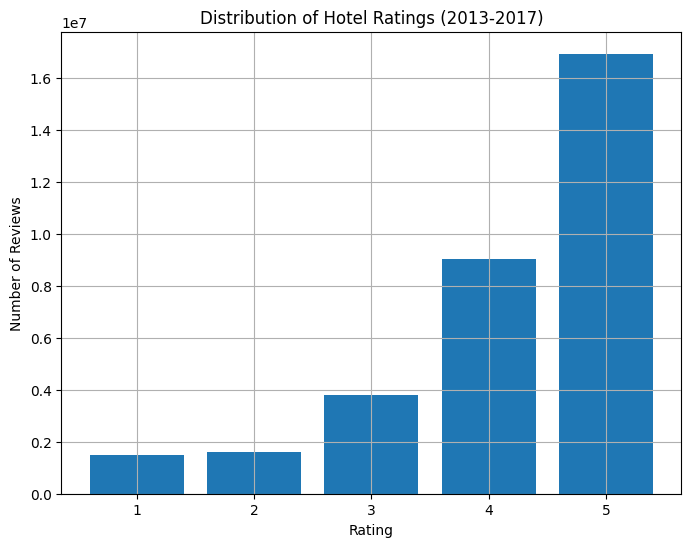

In [7]:
# Counting ratings
rating_counts = {}

for chunk in chunks:
    counts = chunk['rating'].value_counts()
    for rating, count in counts.items():
        if rating not in rating_counts:
            rating_counts[rating] = count
        else:
            rating_counts[rating] += count

# Convert to DataFrame
rating_counts_df = pd.DataFrame(list(rating_counts.items()), columns=['rating', 'count']).sort_values('rating')

# Plot
plt.figure(figsize=(8,6))
plt.bar(rating_counts_df['rating'], rating_counts_df['count'])

plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Hotel Ratings (2013-2017)')
plt.grid(True)
plt.show()

- Most ratings are 5-stars — almost half or more of the dataset.
- 4-star ratings are the second most common.
- Very few 1-star and 2-star ratings.

This means:
- Strong class imbalance - Models trained to predict ratings will be heavily biased toward 5-star unless balance them (e.g., by sampling, weighting).
- Guests tend to leave positive reviews more than negative ones.

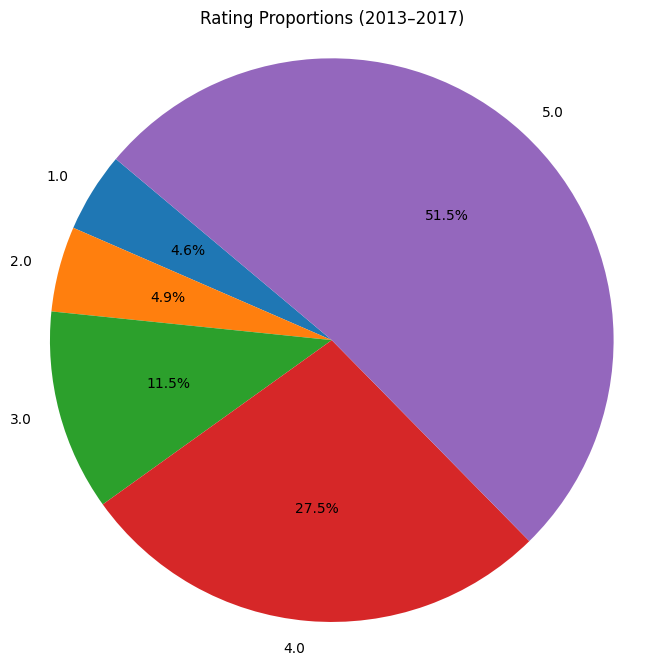

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(rating_counts_df['count'], labels=rating_counts_df['rating'], autopct='%1.1f%%', startangle=140)
plt.title('Rating Proportions (2013–2017)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

## Sentiment Score Distribution

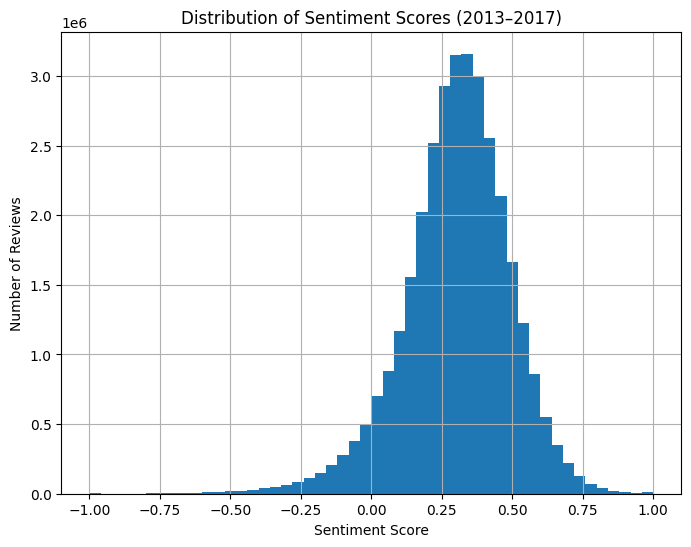

In [9]:
df = pd.read_csv(data_path, compression='gzip', usecols=['sentiment_score'])

# --- Plot sentiment score distribution ---
plt.figure(figsize=(8,6))
df['sentiment_score'].hist(bins=50)

plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Scores (2013–2017)')
plt.grid(True)
plt.show()

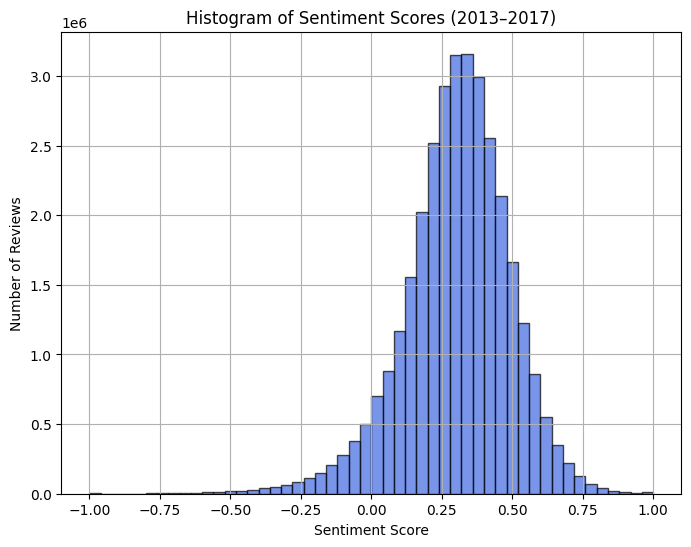

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment_score'], bins=50, edgecolor='black', color='royalblue', alpha=0.7)

plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Sentiment Scores (2013–2017)')
plt.grid(True)
plt.show()

- Sentiment scores are mostly between 0 and 0.5.
- Slightly positive skew (centered around 0.3).
- Very few extremely negative (-1) or extremely positive (+1) reviews.

This means:
- Textual sentiment and numerical ratings are loosely correlated, but not extreme.
- Might still be useful to engineer features from sentiment scores for the models.

## Number of Reviews per Hotel (Hotel Popularity)

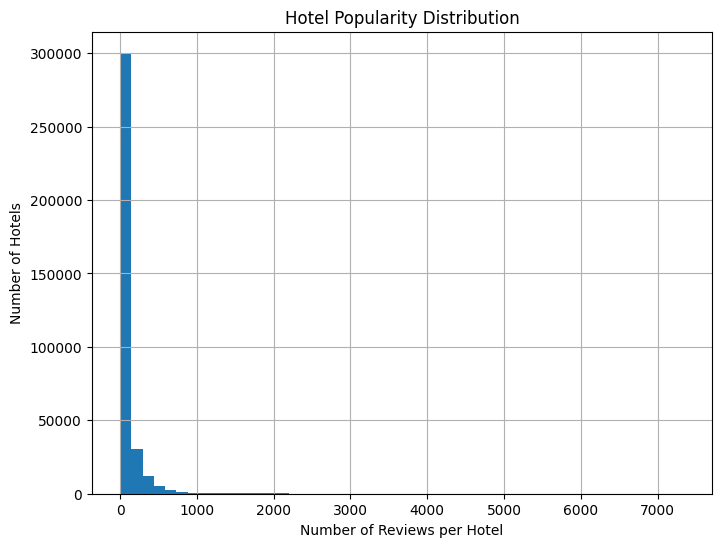

In [8]:
df = pd.read_csv('data/processed/hotelrec_2013_2017.csv.gz', compression='gzip', usecols=['hotel_id'])

# --- Plot reviews per hotel ---
hotel_reviews = df['hotel_id'].value_counts()

plt.figure(figsize=(8,6))
hotel_reviews.hist(bins=50)

plt.xlabel('Number of Reviews per Hotel')
plt.ylabel('Number of Hotels')
plt.title('Hotel Popularity Distribution')
plt.grid(True)
plt.show()

- Most hotels have only a few reviews.
- Only a few hotels have 1000+ reviews.
- Extreme right skew (long tail).

This means:
- have a "long tail problem" — lots of small hotels with very few reviews.
- Popular hotels dominate the dataset.

## Top Hotel Locations

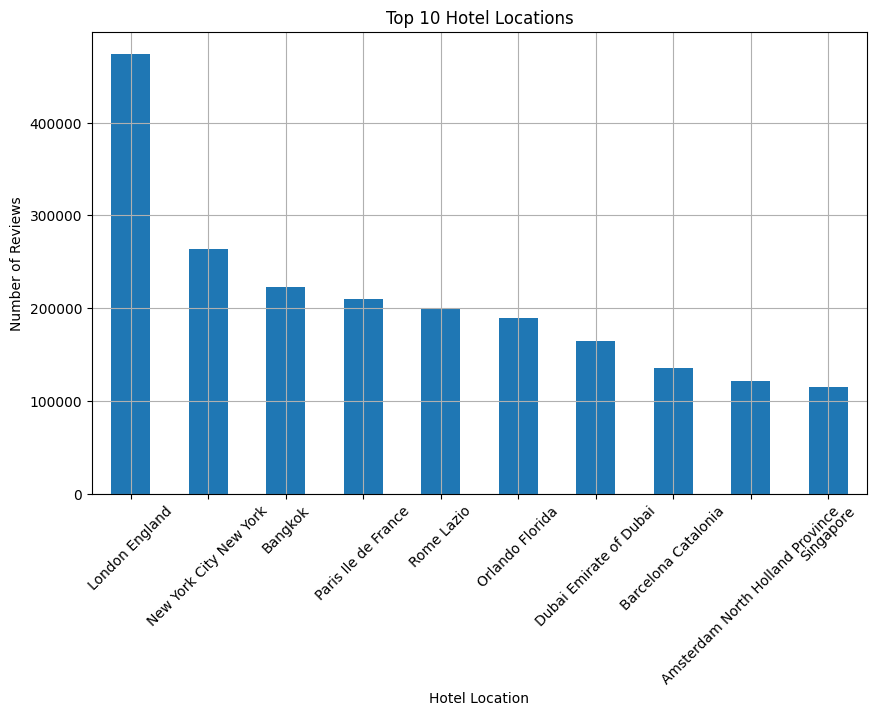

In [16]:
df = pd.read_csv(data_path, compression='gzip', usecols=['hotel_location'])

# --- Plot top hotel locations ---
top_locations = df['hotel_location'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_locations.plot(kind='bar')

plt.xlabel('Hotel Location')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Hotel Locations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

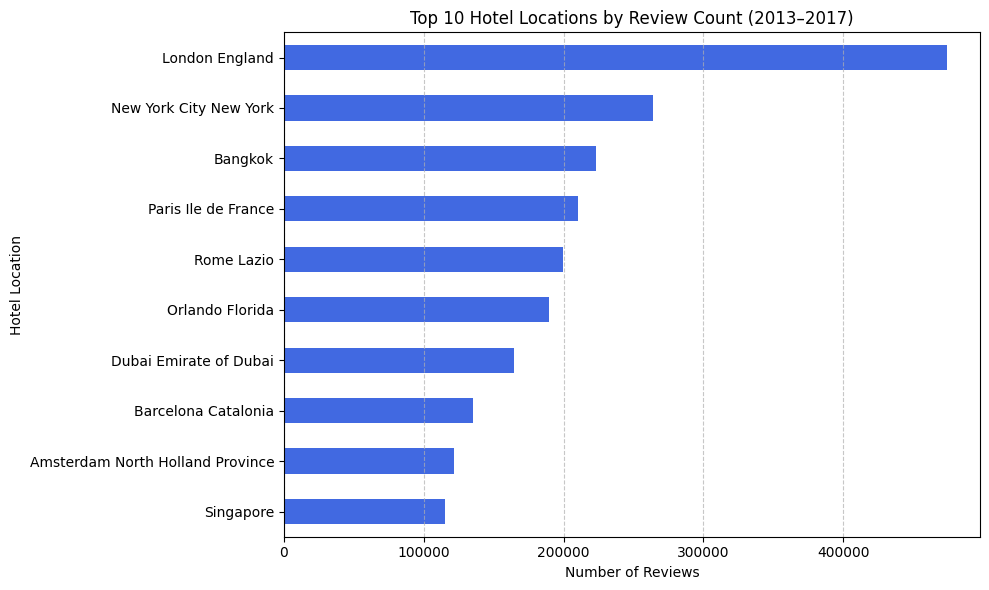

In [20]:
plt.figure(figsize=(10, 6))
top_locations.sort_values().plot(kind='barh', color='royalblue')

plt.xlabel('Number of Reviews')
plt.ylabel('Hotel Location')
plt.title('Top 10 Hotel Locations by Review Count (2013–2017)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_28910/1210151719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


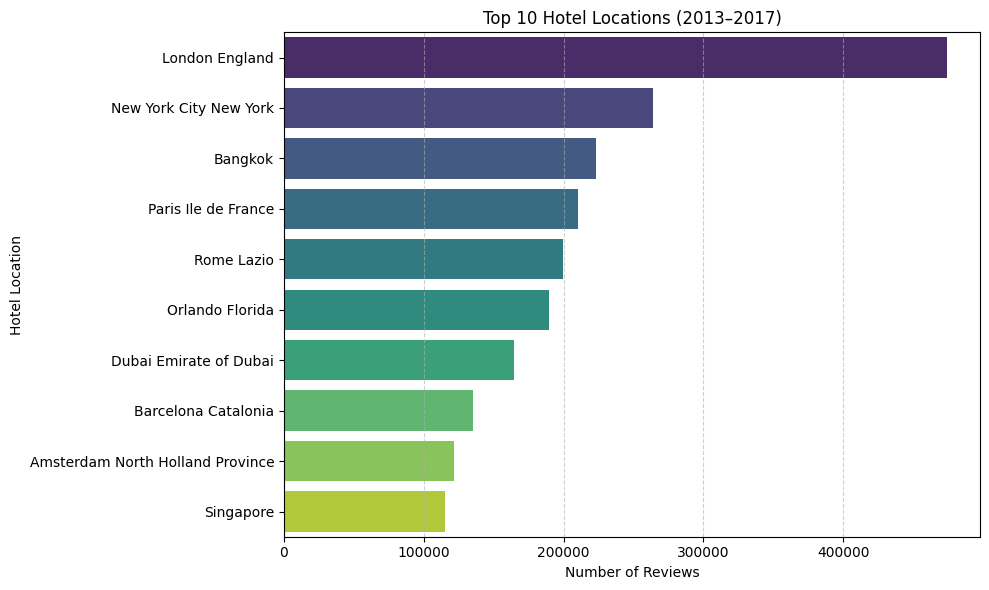

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')

plt.xlabel('Number of Reviews')
plt.ylabel('Hotel Location')
plt.title('Top 10 Hotel Locations (2013–2017)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- London, England is the most reviewed city, by a lot.
- Then New York City, Bangkok, Paris, Rome, etc.
- Mostly major international tourist destinations.

This means:
- The dataset is city-biased - larger cities are overrepresented.
- Models might learn more about popular cities than small towns.

## Reviews per Author (Super-Users Detection)

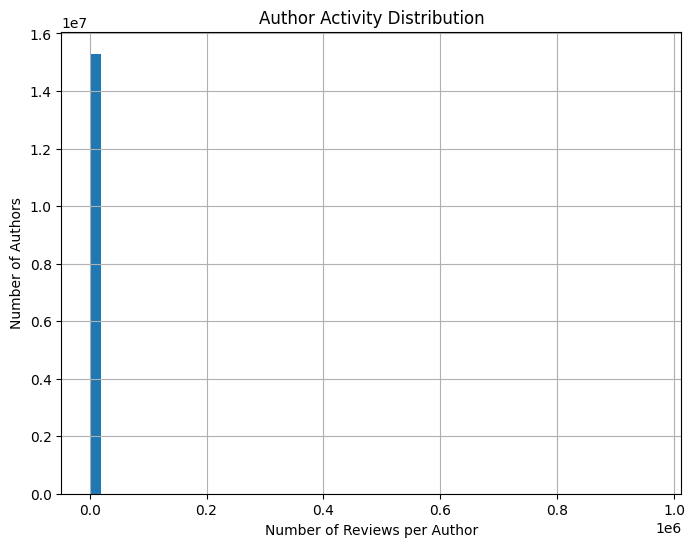

In [10]:
df = pd.read_csv('data/processed/hotelrec_2013_2017.csv.gz', compression='gzip', usecols=['author'])

# --- Plot reviews per author ---
author_reviews = df['author'].value_counts()

plt.figure(figsize=(8,6))
author_reviews.hist(bins=50)

plt.xlabel('Number of Reviews per Author')
plt.ylabel('Number of Authors')
plt.title('Author Activity Distribution')
plt.grid(True)
plt.show()

- Most authors wrote only 1 review.
- Very few "super-users" (authors with 100+ reviews).

What this means:
- Each reviewer mostly contributes once → less concern about "spam" or "power users" skewing the model.
- No need to worry much about user bias.

## Reviews by Month/Season

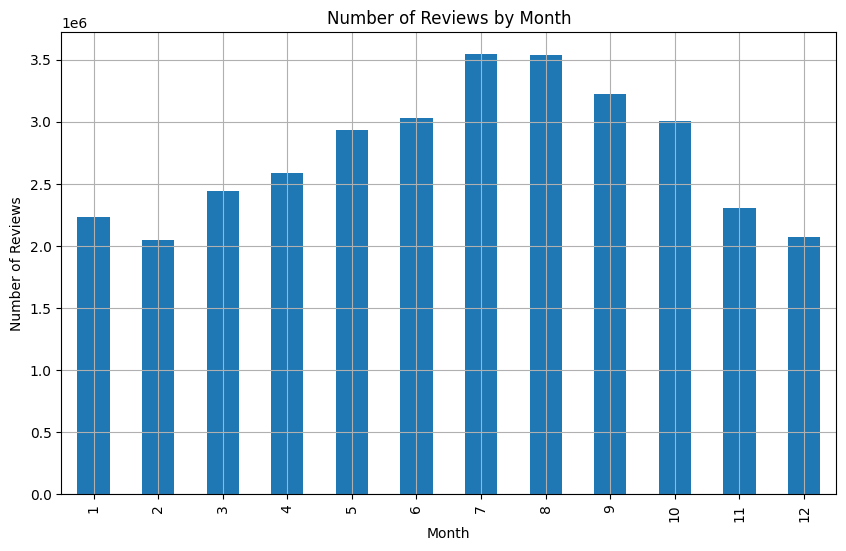

In [11]:
df = pd.read_csv('data/processed/hotelrec_2013_2017.csv.gz', compression='gzip', usecols=['date'])

# --- Extract and plot months ---
df['month'] = df['date'].apply(lambda x: int(str(x)[5:7]) if pd.notnull(x) else None)

plt.figure(figsize=(10,6))
df['month'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Month')
plt.grid(True)
plt.show()

- Peaks in July and August → summer holiday season!
- Drop in November and December → fewer people travel, or reviews get delayed.

This means:
- Seasonality matters → more reviews in summer months.
- cCould engineer "season" as a feature (Summer, Fall, Winter, Spring).